In [1]:


import keras
from keras import backend as K
from keras import Sequential
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
print(mnist)

<module 'keras.datasets.mnist' from '/home/icameisaticoded/.local/lib/python3.6/site-packages/keras/datasets/mnist.py'>


In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
rows = 28
cols = 28
batch_size = 128
num_classes = 10
epochs = 12

In [50]:
K.image_data_format()

'channels_last'

In [51]:
# image reshaping
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, rows, cols)
    x_test = x_test.reshape(x_test.shape[0], 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
    x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
    input_shape = (rows, cols, 1)

In [52]:
#image resizing and type conversion
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize images
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [53]:
print(type(y_train))
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [54]:
#import layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [68]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,callbacks=[PlotLossesKeras()],`
          validation_data=(x_test, y_test))

In [55]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028615241092809447
Test accuracy: 0.9903


In [61]:
i = x_test[0]
i = i.reshape(1, 28, 28, 1)
y_pred = model.predict_classes(i)



In [62]:
print(y_pred)


[7]


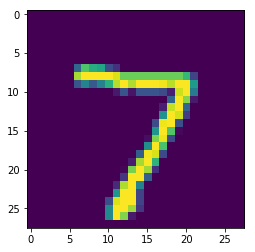

In [64]:
i = i.reshape((28, 28))
plt.imshow(i)